# Exercise

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. 

1. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

### Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

### Read data

In [53]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
df.drop(['sepal width (cm)', 'sepal length (cm)'], axis='columns', inplace=True)

df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Preprocessing data

In [55]:
scalar = MinMaxScaler()

columns_to_scale = ['petal length (cm)', 'petal width (cm)']
df[columns_to_scale] = scalar.fit_transform(df[columns_to_scale])

df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


### Evaluating

In [57]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

### Visualization

<AxesSubplot: >

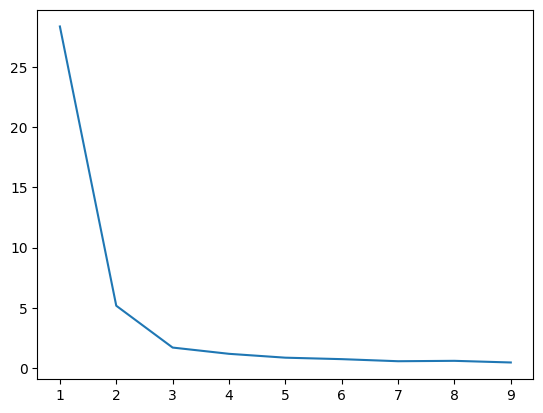

In [59]:
sns.lineplot(x=k_range, y=sse)

The optimal value of k is 3

### modeling

In [60]:
km = KMeans(n_clusters=3, n_init='auto')
y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
df['cluster'] = y_pred

df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

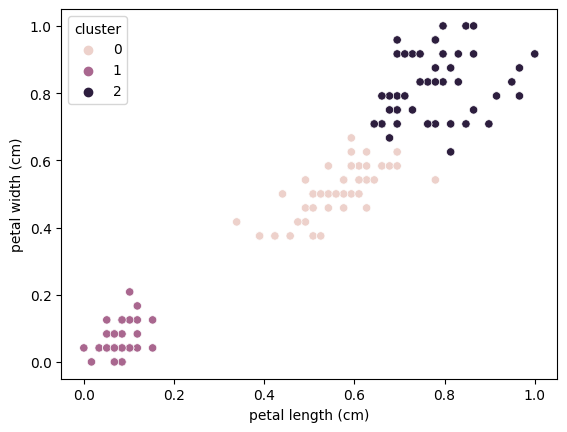

In [65]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster')